# Data Exploration

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import autocorrelation_plot
from sklearn import preprocessing
import statsmodels.api as sm

# Quarterly Data - homelessness

In [29]:
# quarterly data on homelessness and the waiting list
df = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=4)
TA = df.iloc[0:, 3]
# TA_norm = [float(i)/sum(TA) for i in TA]
TA_norm = preprocessing.normalize([TA])[0]

dwellings = df.iloc[0:, 4]
# dwellings_norm = [float(i)/sum(dwellings) for i in dwellings]
dwellings_norm = preprocessing.normalize([dwellings])[0]

main = df.iloc[0:, 5]
# main_norm =  [float(i)/sum(main) for i in main]
main_norm = preprocessing.normalize([main])[0]


In [30]:
df.iloc[0:, 2]

0     1998 - Q1
1     1998 - Q2
2     1998 - Q3
3     1998 - Q4
4     1999 - Q1
        ...    
90    2020 - Q3
91    2020 - Q4
92    2021 - Q1
93    2021 - Q2
94    2021 - Q3
Name: title, Length: 95, dtype: object

In [31]:
localization = df.iloc[0:, 2]
localization = ['1998 - Q1','Q2','Q3','Q4',
    '1999 - Q1','99-Q2','99-Q3','99-Q4',
    '2000 - Q1','00-Q2','00-Q3','00-Q4',
    '2001 - Q1','01-Q2','01-Q3','01-Q4',
    '2002 - Q1','02-Q2','02-Q3','02-Q4',
    '2003 - Q1','03-Q2','03-Q3','03-Q4',
    '2004 - Q1','04-Q2','04-Q3','04-Q4',
    '2005 - Q1','05-Q2','05-Q3','05-Q4',
    '2006 - Q1','06-Q2','06-Q3','06-Q4',
    '2007 - Q1','07-Q2','07-Q3','07-Q4',
    '2008 - Q1','08-Q2','08-Q3','08-Q4',
    '2009 - Q1','09-Q2','09-Q3','09-Q4',
    '2010 - Q1','10-Q2','10-Q3','10-Q4',
    '2011 - Q1','11-Q2','11-Q3','11-Q4',
    '2012 - Q1','12-Q2','12-Q3','12-Q4',
    '2013 - Q1','13-Q2','13-Q3','13-Q4',
    '2014 - Q1','14-Q2','14-Q3','14-Q4',
    '2015 - Q1','15-Q2','15-Q3','15-Q4',
    '2016 - Q1','16-Q2','16-Q3','16-Q4',
    '2017 - Q1','17-Q2','17-Q3','17-Q4',
    '2018 - Q1','18-Q2','18-Q3','18-Q4',
    '2019 - Q1','19-Q2','19-Q3','19-Q4',
    '2020 - Q1','20-Q2','20-Q3','20-Q4',
    '2021 - Q1','21-Q2','21-Q3']


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


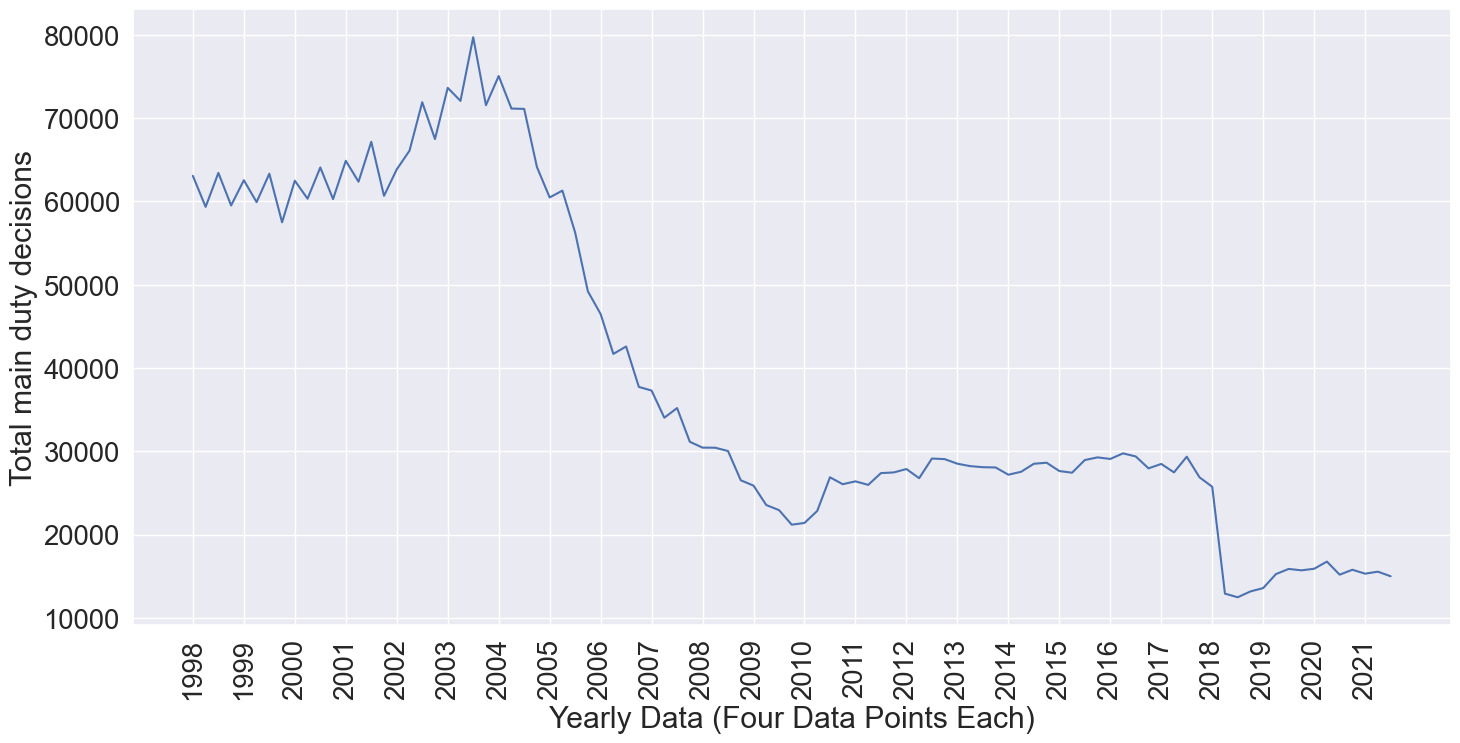

In [95]:

# before removing trend
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
ax = sns.set(font_scale = 1.8)
ax = sns.set_theme()

ax = sns.lineplot(df.iloc[0:, 2],main,markers=True, dashes=False)
ax.set(xlabel='Yearly Data (Four Data Points Each)', ylabel='Total main duty decisions')
plt.xticks(list(range(0,96,4)), list(range(1998,2022)))
plt.savefig('Figure/Linda_quarter_homeless.png',dpi = 300,bbox_inches='tight')
#plt.plot(df.iloc[0:, 2], main_norm, label = "Main Duty Owed")

In [97]:
main_plot = pd.DataFrame(main)
main_plot.columns = ['Data']

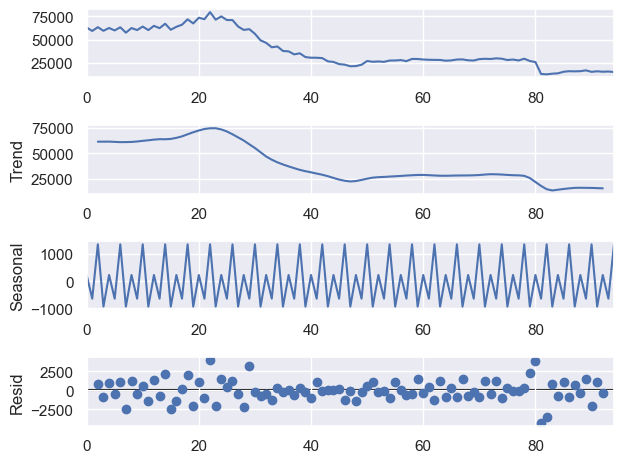

In [99]:
import statsmodels.api as sm
plt.rcParams.update(plt.rcParamsDefault)

decomposition = sm.tsa.seasonal_decompose(main_plot, model='additive', period =4)
fig = sns.set_theme()
fig = decomposition.plot()

plt.savefig('Figure/homeless_decomp.png')

## Autocorrelation

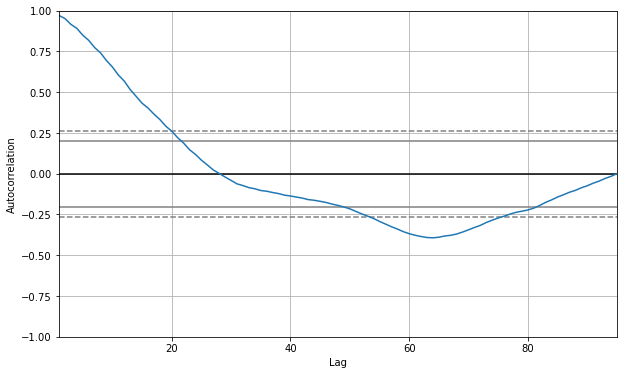

In [5]:
# autocorralation
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(df['main']);

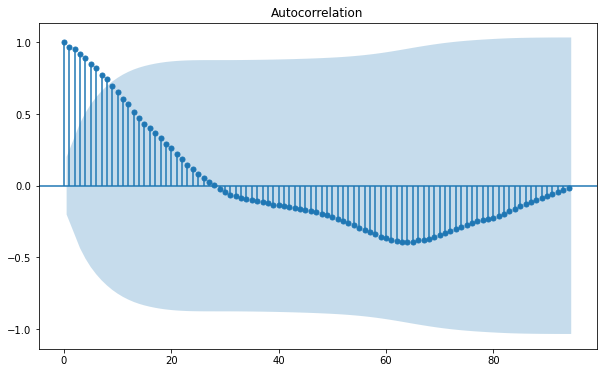

In [12]:
import statsmodels.api as sm
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(main, lags = 94);

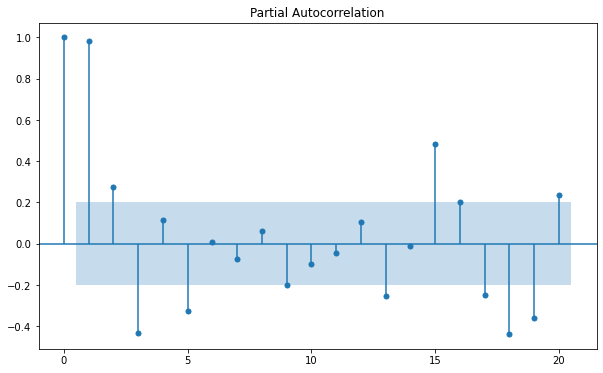

In [13]:
# partial autocorrelation
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df['main']);

## Removing Trend

In [4]:
# removing trend by differencing to make time-sereis data stationary
data = df['main'] - df['main'].shift(1)
# plt.rc("figure", figsize=(10,6))
# sm.graphics.tsa.plot_acf(data[1:], lags=50);


In [9]:
# data1 = df['dwellings'] - df['dwellings'].shift(1)
# plt.rc("figure", figsize=(10,6))
# sm.graphics.tsa.plot_acf(data1[1:], lags=50);

# df_trend = pd.read_excel (r"Data/TS_trend.xlsx", sheet_name=0)
# df_trend.insert(loc=1,
#           column='dwellings',
#           value=data1)
# display(df_trend)

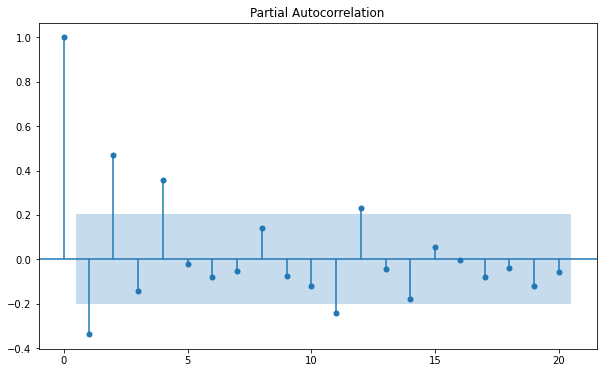

In [10]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data[1:]);

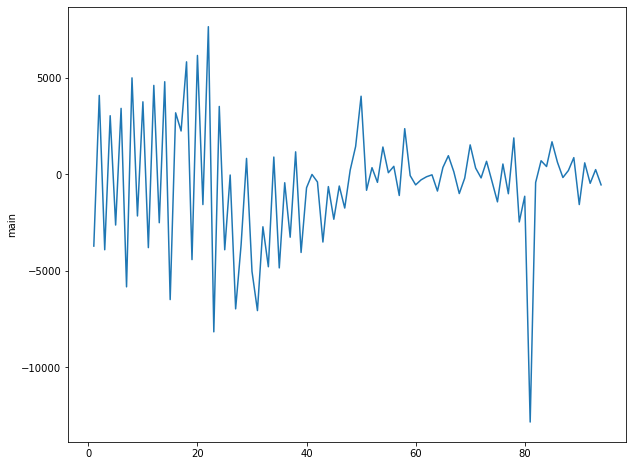

In [11]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data[1:], palette="deep");

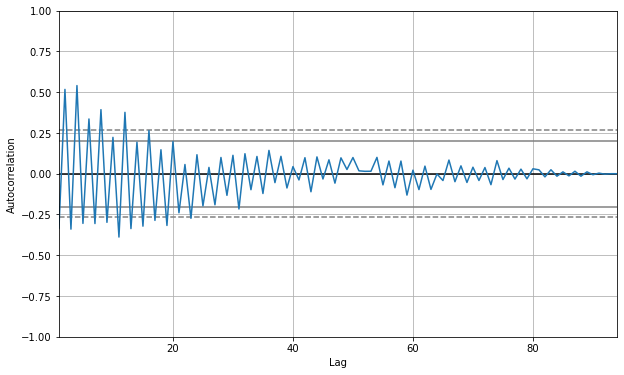

In [12]:
pd.plotting.autocorrelation_plot(data[1:]);

## Stationarity

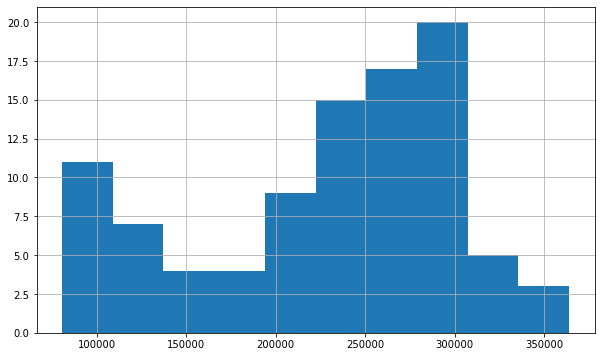

In [13]:
# review summary statistics
df_focus = df['dwellings']
# df_focus = merged_all['price']
df_focus.hist()
plt.show();

In [28]:
# The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. 
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

from statsmodels.tsa.stattools import adfuller

X = main.values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.240789
p-value: 0.655808
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [31]:
# try with the removed trend data

X = data[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -2.891976
p-value: 0.046289
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


# Forecasting on quarterly homelessness

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Year and quarter'), Text(0, 0.5, 'Total main duty decisions')]

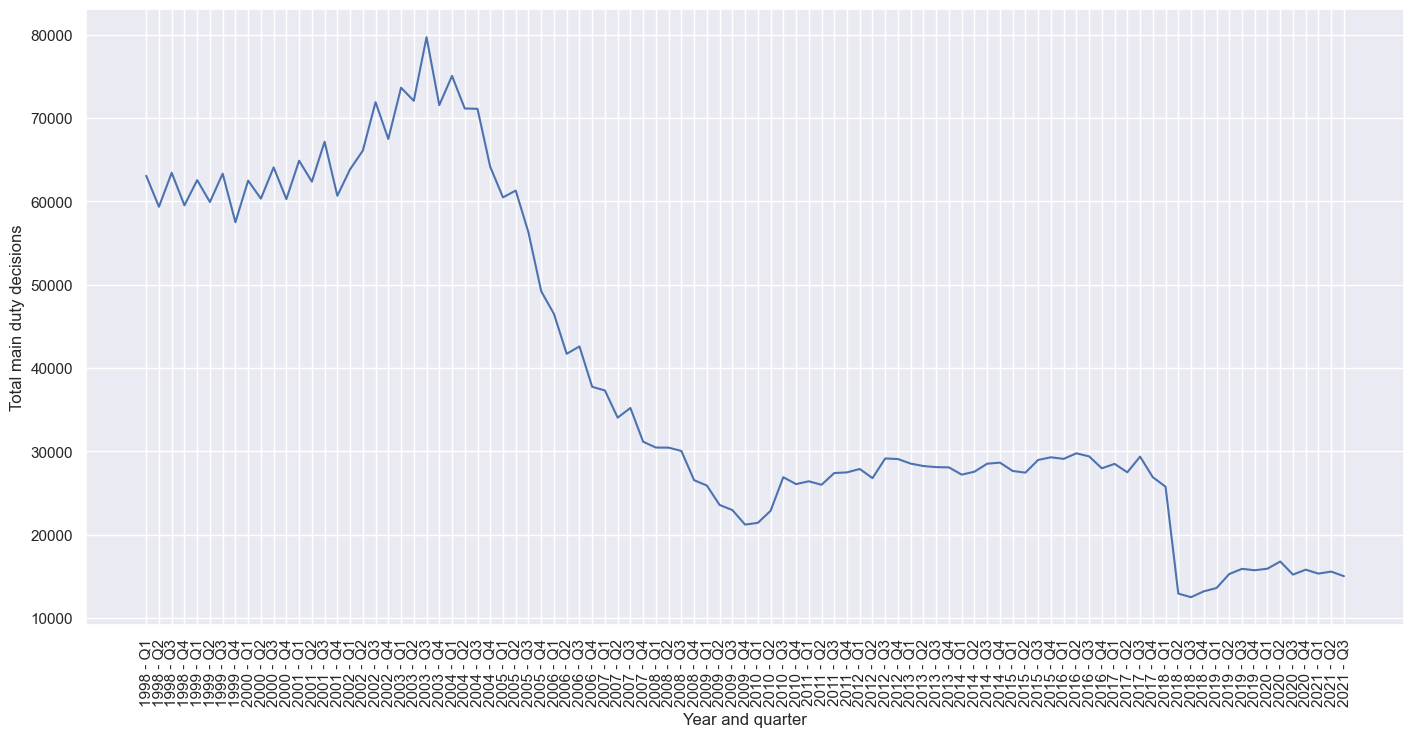

In [112]:
df_focus = main
df_trend = pd.read_excel (r"Data/TS_trend.xlsx", sheet_name=0)

plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
ax = sns.lineplot(df.iloc[0:, 2], main)
ax.set(xlabel='Year and quarter', ylabel='Total main duty decisions')
#plt.plot(df.iloc[0:, 2], main_norm, label = "Main Duty Owed")
#


## Simple Exponential Smoothing

3560600993.896282 1069607859.853663 938474908.9062502


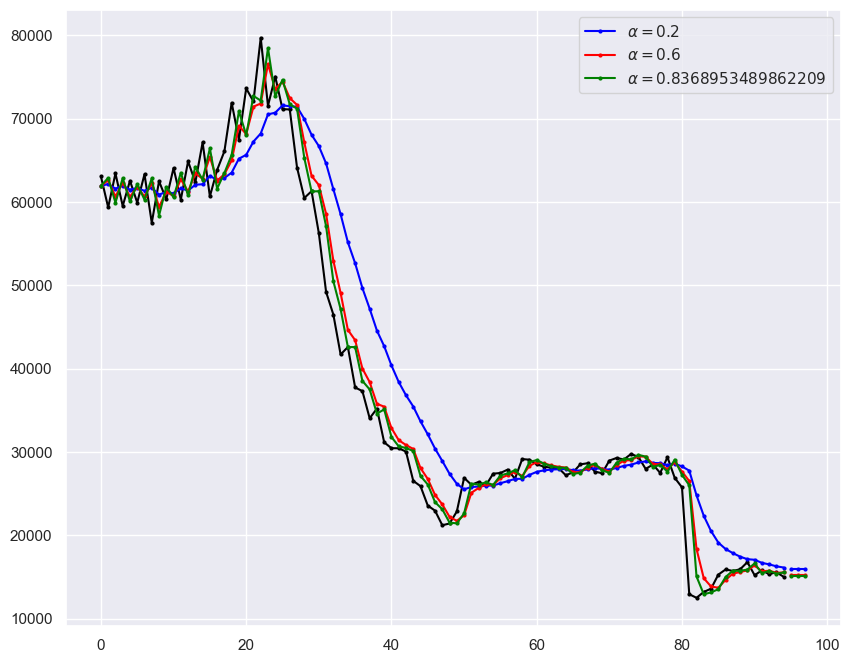

In [115]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(df_focus, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.plot(df_focus, marker="o", color="black", markersize = 2)
plt.plot(fit1.fittedvalues, marker="o", color="blue", markersize = 2)
(line1,) = plt.plot(fcast1, marker="o", color="blue", markersize = 2)
plt.plot(fit2.fittedvalues, marker="o", color="red", markersize = 2)
(line2,) = plt.plot(fcast2, marker="o", color="red", markersize = 2)
plt.plot(fit3.fittedvalues, marker="o", color="green", markersize = 2)
(line3,) = plt.plot(fcast3, marker="o", color="green", markersize = 2)
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
print(fit1.sse, fit2.sse, fit3.sse)
plt.savefig('Figure/homless_ses.png')


## Holts Method


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


896624849.8032434 875728006.4225892 889176230.5458251


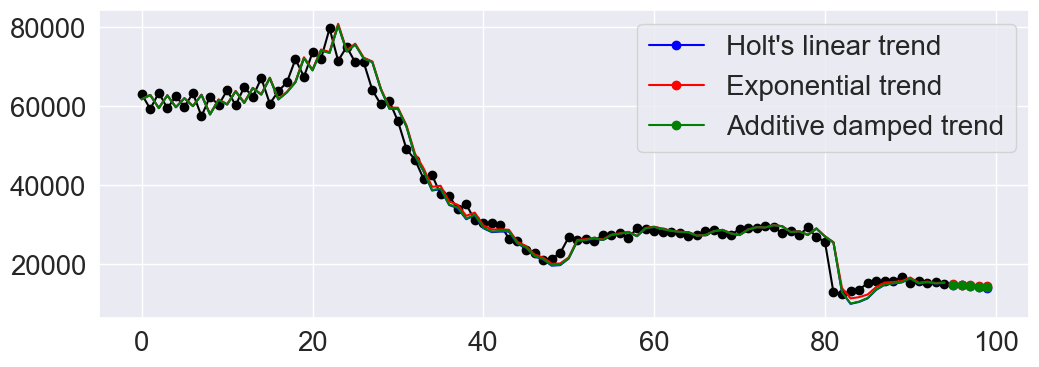

In [152]:
# holts method

fit1 = Holt(df_focus, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(df_focus, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(df_focus, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 4))
plt.plot(df_focus, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name],loc=1, prop={'size': 20})
print(fit1.sse, fit2.sse, fit3.sse)

plt.savefig('Figure/homless_holt.png',dpi=300)

## Autoregression

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Year and quarter'), Text(0, 0.5, 'Total main duty decisions')]

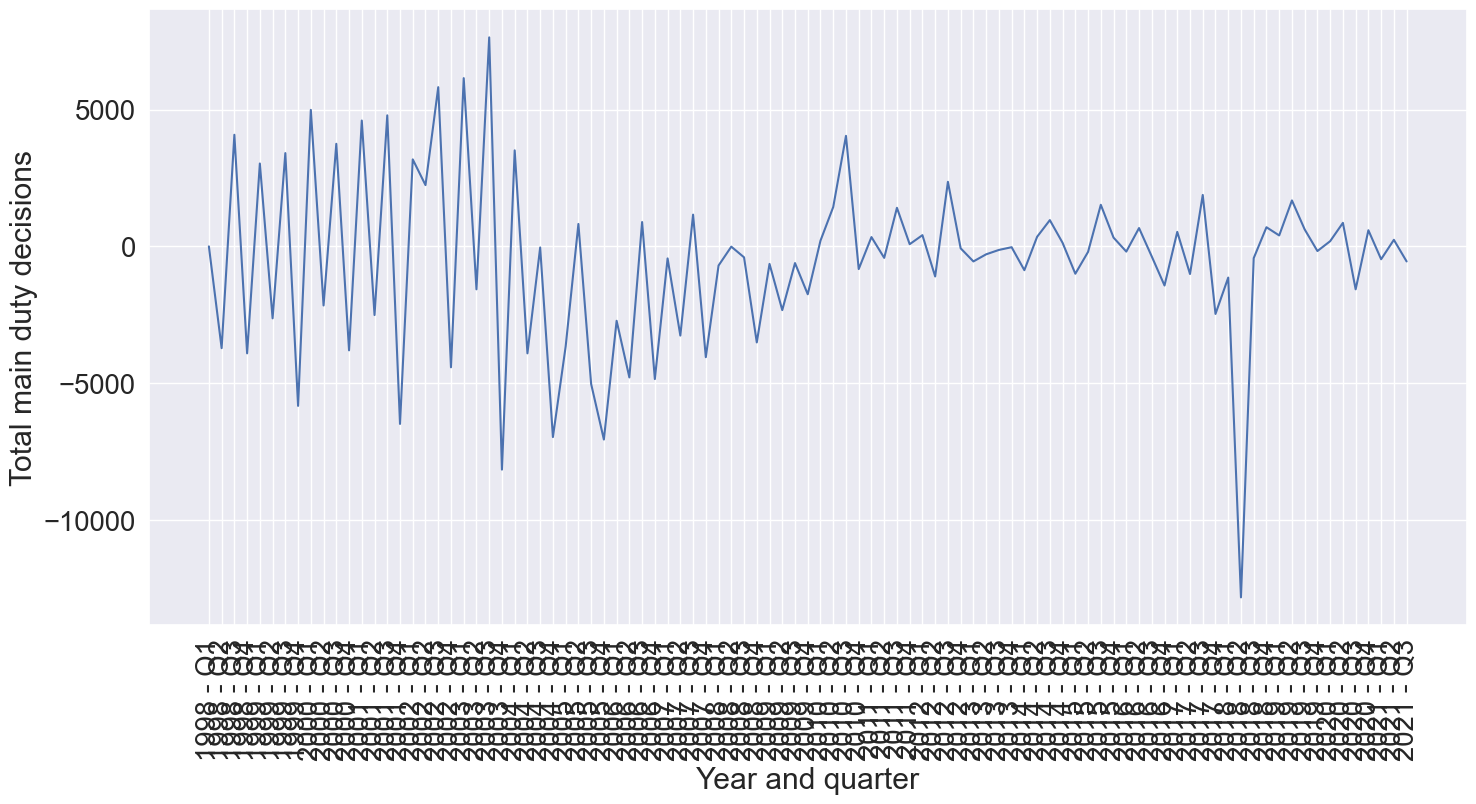

In [140]:
df_trend = pd.read_excel (r"Data/TS_trend.xlsx", sheet_name=0)

plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
ax = sns.lineplot(df.iloc[0:, 2], df_trend.iloc[0:,1])
ax.set(xlabel='Year and quarter', ylabel='Total main duty decisions')


In [141]:
# Create training and test data
#

train_data = df_trend['main'][:len(df_trend)-110]
test_data = df_trend['main'][len(df_trend)-110:]
len(train_data)
len(test_data)

15

In [142]:
# AR example
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from random import random
# contrived dataset
data = train_data
# fit model1
model = AutoReg(data, lags=39, old_names = True)
model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

print(model_fit.summary())
fig = plt.figure(figsize=(16, 9))
# fig = model_fit.plot_diagnostics(fig=fig, lags=30)

# fig = model_fit.plot_predict(start=None, end=None)

                            AutoReg Model Results                             
Dep. Variable:                   main   No. Observations:                   80
Model:                    AutoReg(39)   Log Likelihood                -317.522
Method:               Conditional MLE   S.D. of innovations            558.633
Date:                Mon, 02 May 2022   AIC                             14.651
Time:                        16:32:05   BIC                             16.365
Sample:                            39   HQIC                            15.275
                                   80                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1081.6400    571.811      1.892      0.059     -39.089    2202.369
main.L1       -0.4736      0.290     -1.635      0.102      -1.041       0.094
main.L2       -0.4229      0.219     -1.933      0.0

<Figure size 1600x900 with 0 Axes>

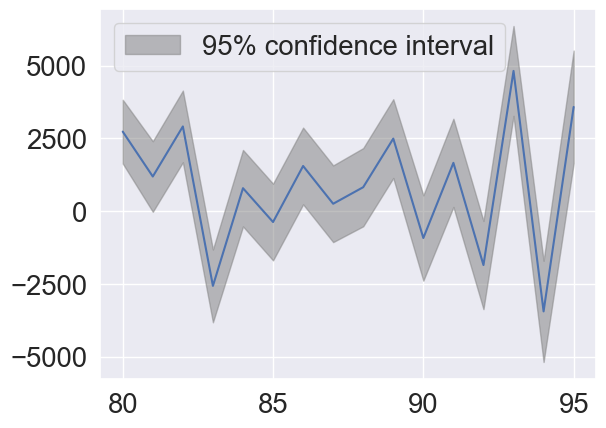

In [143]:
fig = model_fit.plot_predict(start=80, end=95, dynamic=False, exog=None, exog_oos=None, alpha=0.05, in_sample=True, fig=None, figsize=None)

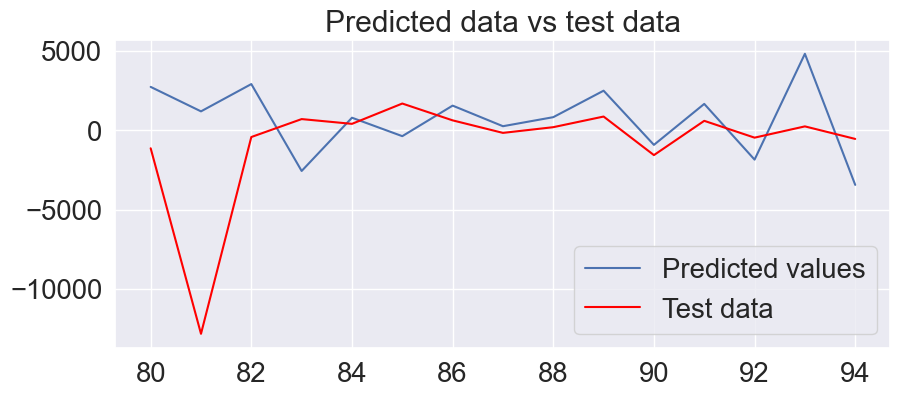

In [163]:
# Make the predictions
#
pred = model_fit.predict(start=len(data), end=(len(df_trend)-1), dynamic=False)
# Plot the prediction vs test data
#
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 15})
plt.plot(pred, label = "Predicted values")
plt.plot(test_data, color='red', label ="Test data")
plt.title("Predicted data vs test data")
plt.legend()
plt.savefig('Figure/homeless_autoregression.png')
plt.show()


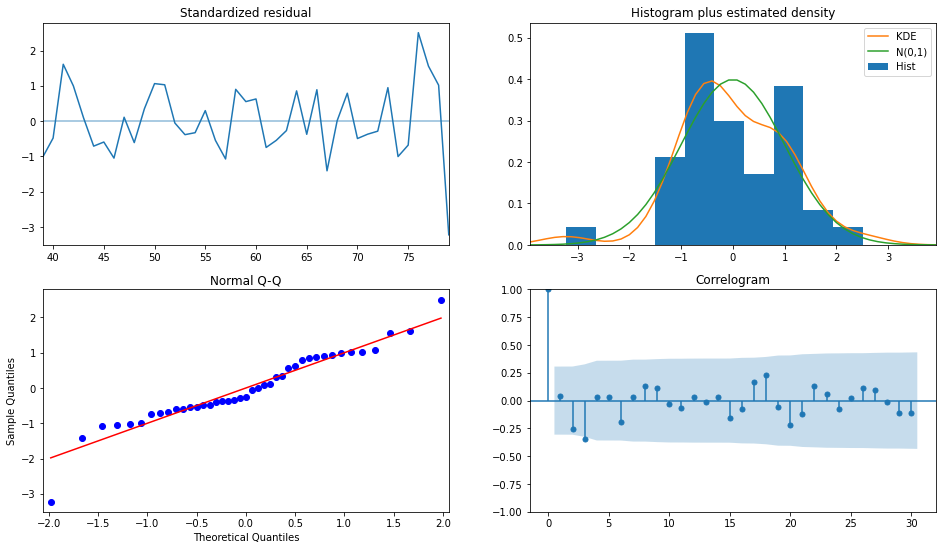

In [214]:
fig = plt.figure(figsize=(16, 9))
fig = model_fit.plot_diagnostics(fig=fig, lags=30)

#  Yearly - waiting list

In [79]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)
waitingCol = waiting.iloc[0][2:]

allTS = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=0)
waiting2 = allTS.iloc[0:, 5]
allTS['Size_of_waiting_list'] = allTS['Size_of_waiting_list'].fillna(0)
waiting2N = preprocessing.normalize([waiting2])[0]


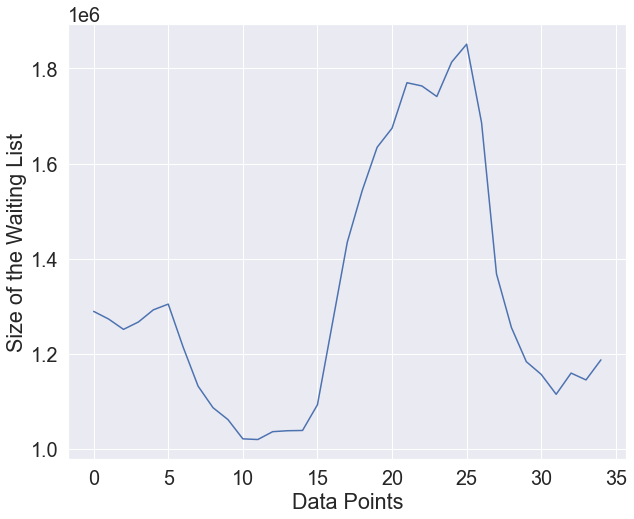

In [82]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=merged['waiting'], palette="deep");
ax=sns.lineplot(data=waiting2, palette="deep");
ax.set(xlabel='Data Points', ylabel='Size of the Waiting List')
plt.savefig('Figure/waiting_q.png')

In [103]:
waiting2_plot = pd.DataFrame(waiting2)
waiting2.columns = ['Size of Waiting List']

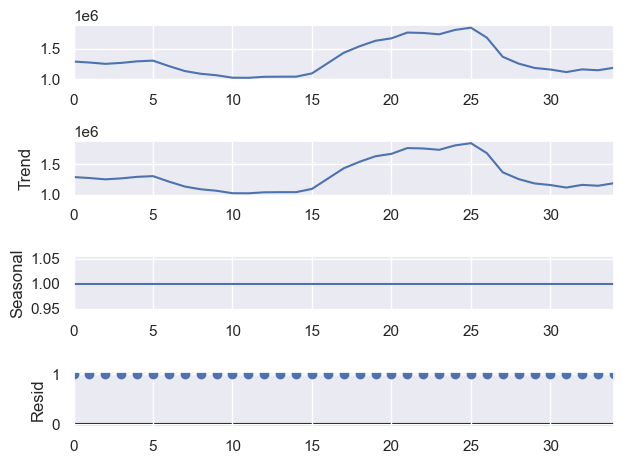

In [109]:
decomposition = sm.tsa.seasonal_decompose(waiting2_plot, model='multiplicative', period =1)
fig = sns.set_theme()
fig = decomposition.plot()
plt.savefig('Figure/waiting_decomp.png')

## Autocorrelation 

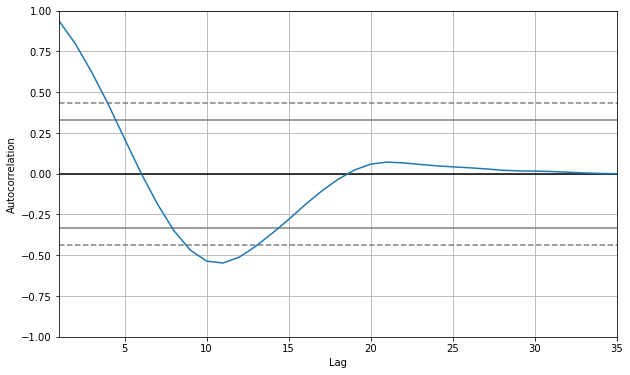

In [47]:
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(waiting2);

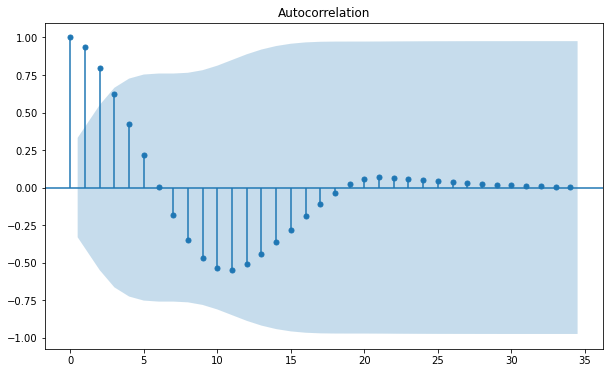

In [48]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(waiting2, lags = 34);

C:\Users\linda\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


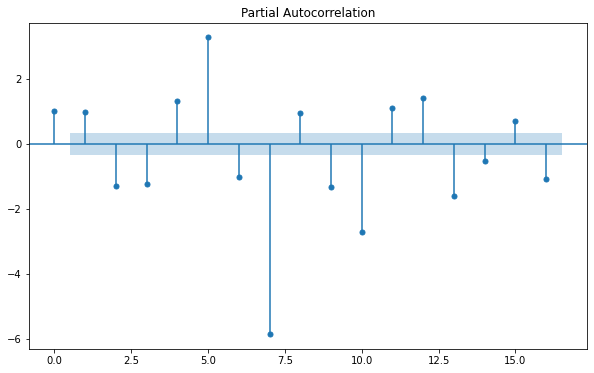

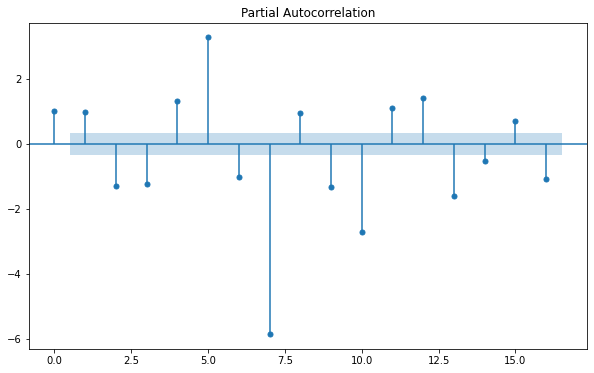

In [49]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(waiting2[1:])

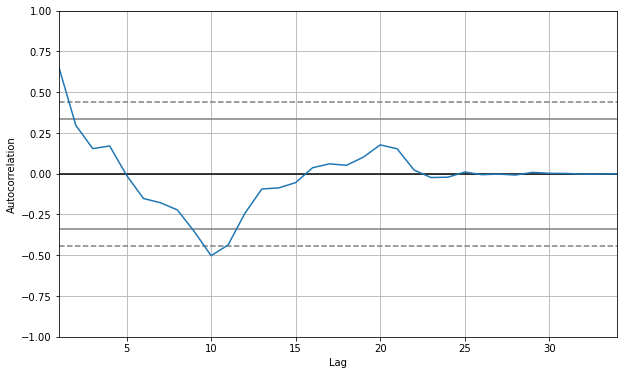

In [54]:
pd.plotting.autocorrelation_plot(data2[1:]);

In [146]:
# stationarity
# try with the removed trend data

X = waiting2.values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: 0.521925
p-value: 0.985524
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636


## Removing Trend 

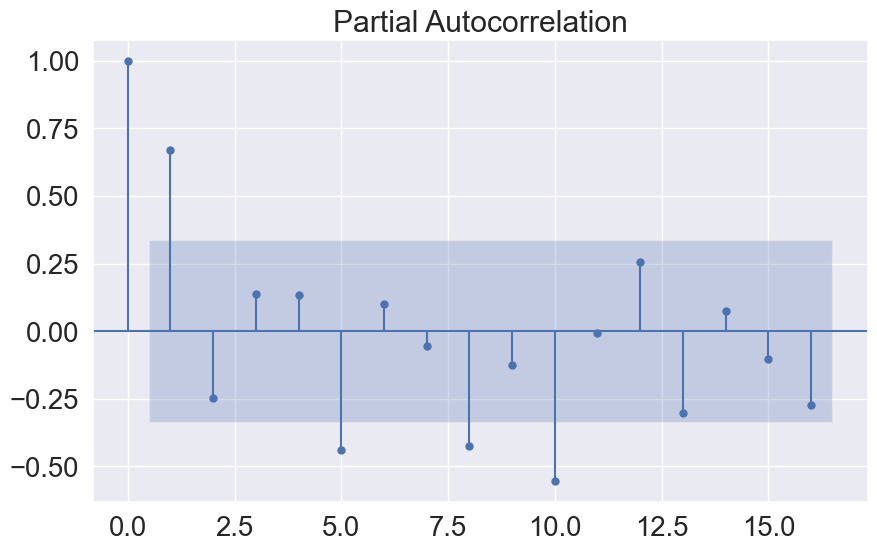

In [155]:
# remove trend form waiting list
data2 = allTS['Size_of_waiting_list'] - allTS['Size_of_waiting_list'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data2[1:], lags=16)

data2.to_excel("Data/TS2_trend.xlsx")

In [156]:
# stationarity
# try with the removed trend data

X = data2[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

NameError: name 'adfuller' is not defined

## Forecasting

Text(0, 0.5, 'main')

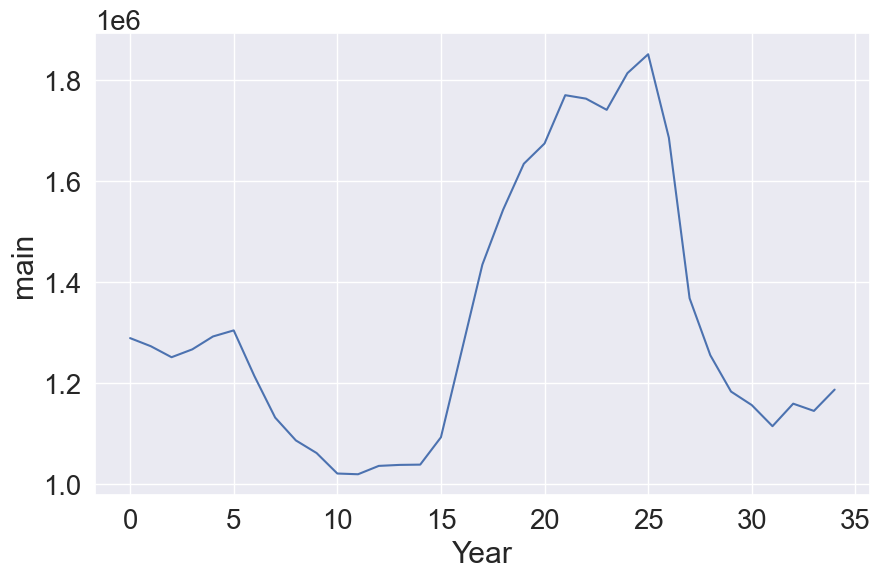

In [157]:
df_focus = waiting2
ax = df_focus.plot()
ax.set_xlabel("Year")
ax.set_ylabel("main")

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1652948955768.483 539612899152.4625 278788743190.74304


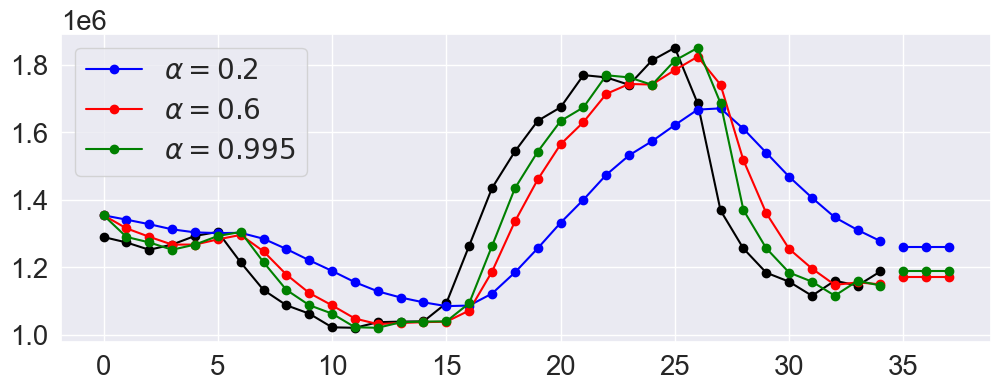

In [160]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(df_focus, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 4))
plt.plot(df_focus, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name],loc=2, prop={'size': 20})
print(fit1.sse, fit2.sse, fit3.sse)

plt.savefig('Figure/waiting_ses.png')

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


356119946187.9331 370344803910.19257 349072027981.60815


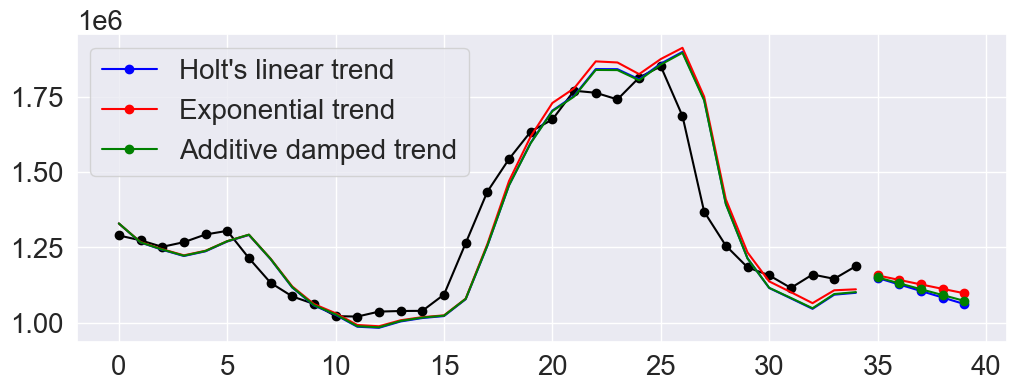

In [161]:
# holts method

fit1 = Holt(df_focus, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(df_focus, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(df_focus, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 4))
plt.plot(df_focus, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name],loc=2, prop={'size': 20})
print(fit1.sse, fit2.sse, fit3.sse)

plt.savefig('Figure/waiting_holts.png')

C:\Users\linda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Size of waiting list')]

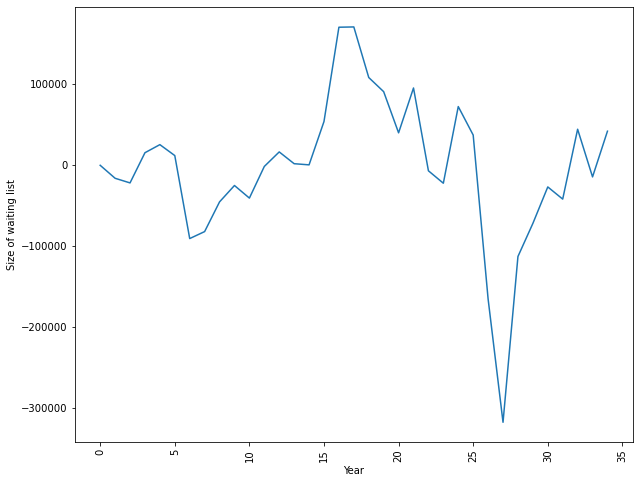

In [197]:

plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
ax = sns.lineplot(df_trend2.iloc[0:,0], df_trend2.iloc[0:,1])
ax.set(xlabel='Year', ylabel='Size of waiting list')

In [39]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

df_trend2 = pd.read_excel (r"Data/TS2_trend.xlsx", sheet_name=0)
train_data2 = df_trend2['Size_of_waiting_list'][:len(df_trend2)-10]
test_data2 = df_trend2['Size_of_waiting_list'][len(df_trend2)-10:]
print(len(train_data2))
print(len(test_data2))
data = train_data2

# fit model1
model2 = AutoReg(data, lags=10, old_names = True)
model_fit = model2.fit()

print(model_fit.summary())
fig = plt.figure(figsize=(16, 9))

# fig = model_fit.plot_diagnostics(fig=fig, lags=30)
# fig = model_fit.plot_predict(start=None, end=None)

25
10
                             AutoReg Model Results                              
Dep. Variable:     Size_of_waiting_list   No. Observations:                   25
Model:                      AutoReg(10)   Log Likelihood                -174.082
Method:                 Conditional MLE   S.D. of innovations          26542.506
Date:                  Sun, 01 May 2022   AIC                             21.973
Time:                          18:37:42   BIC                             22.539
Sample:                              10   HQIC                            21.967
                                     25                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                 1.161e+04   9077.633      1.279      0.201   -6179.284    2.94e+04
Size_of_waiting_list.L1      0.0075      0.291      0.026      0.98

<Figure size 1152x648 with 0 Axes>

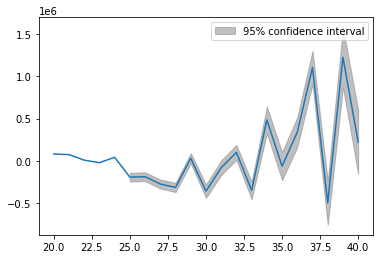

In [40]:
fig = model_fit.plot_predict(start=20, end=40, dynamic=False, exog=None, exog_oos=None, alpha=0.05, in_sample=True, fig=None, figsize=None)

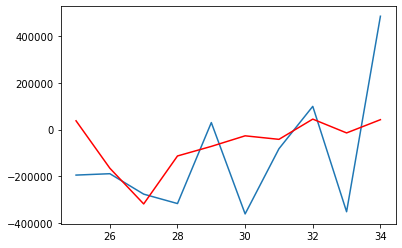

In [41]:
# Make the predictions
#
pred = model_fit.predict(start=len(data), end=(len(df_trend2)-1), dynamic=False)

# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data2, color='red')

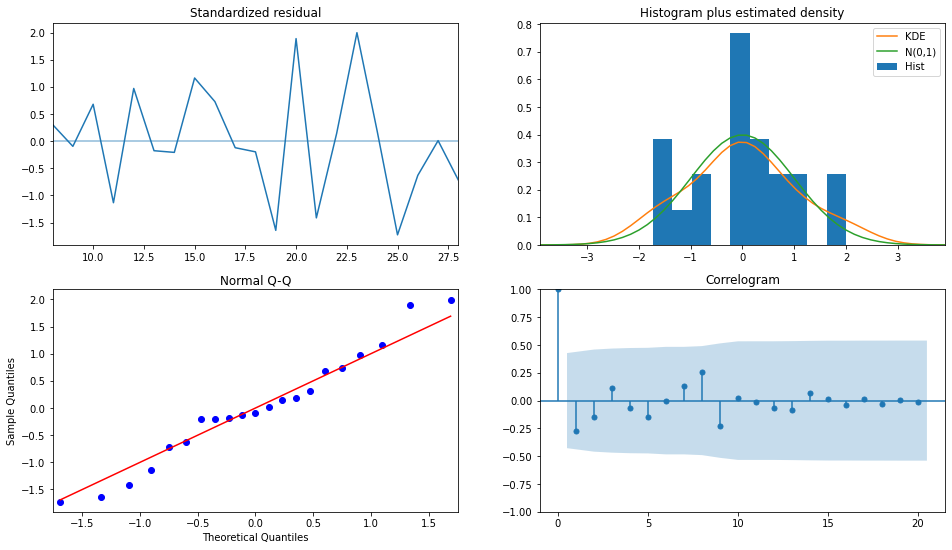

In [67]:
fig = plt.figure(figsize=(16, 9))
fig = model_fit.plot_diagnostics(fig=fig, lags=20)